#Slow Component filtering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import gitInformation
import random

In [3]:
%matplotlib inline 

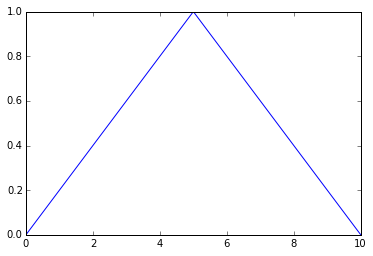

In [4]:
# Generate a triangle and normalize it.
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri2 = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri = tri/5.
tri2 = tri2/5.
plt.plot(tri)

In [5]:
def sineGenerator(samples, waveNumber = 1):
    time = np.linspace(0, 2, samples)
    data = np.sin(np.pi*time*waveNumber)
    return data

In [6]:
# Add spikes to the generated sine waves, at random position and with random spike height.
def spikeAdder(data, tri):
    randomPosition = 0
    while (randomPosition + 11) < len(data):
        randomPosition = randomPosition + random.randint(50,100)
        if len(data[randomPosition:randomPosition + 11]) == 11:
            tri1 = tri/random.uniform(1, 3*tri.max())
            data[randomPosition:randomPosition + 11] = data[randomPosition:randomPosition + 11] + tri1
    return data

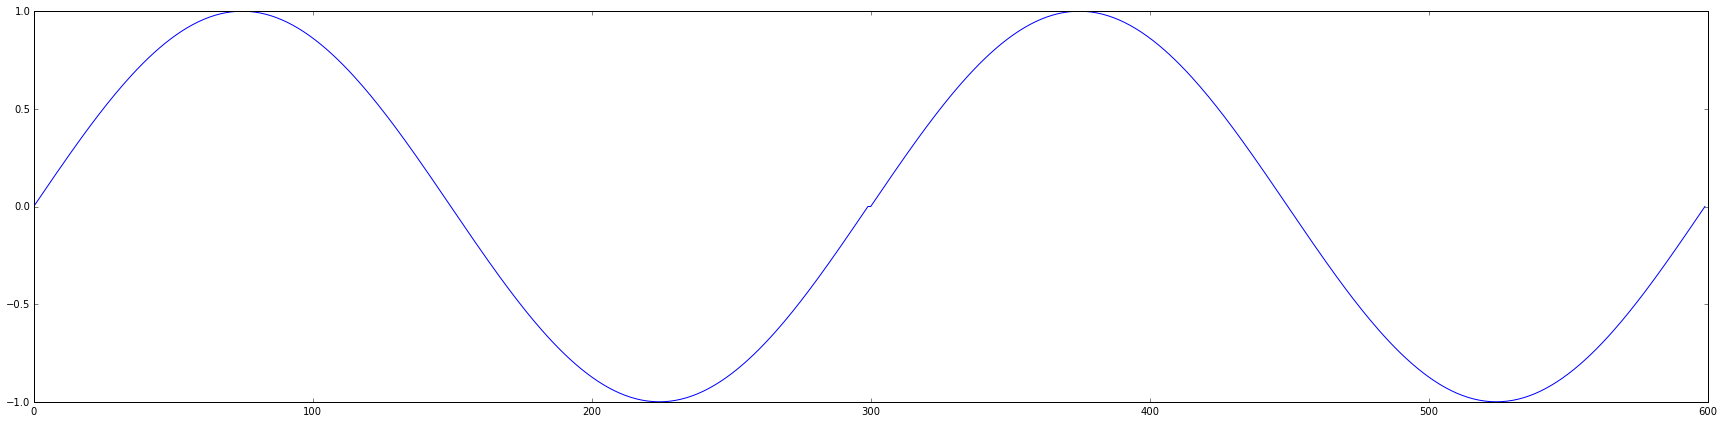

In [7]:
data = sineGenerator(300,1)
data = np.append(data, sineGenerator(300,1))
plt.figure(figsize=(30,7))
plt.plot(data)

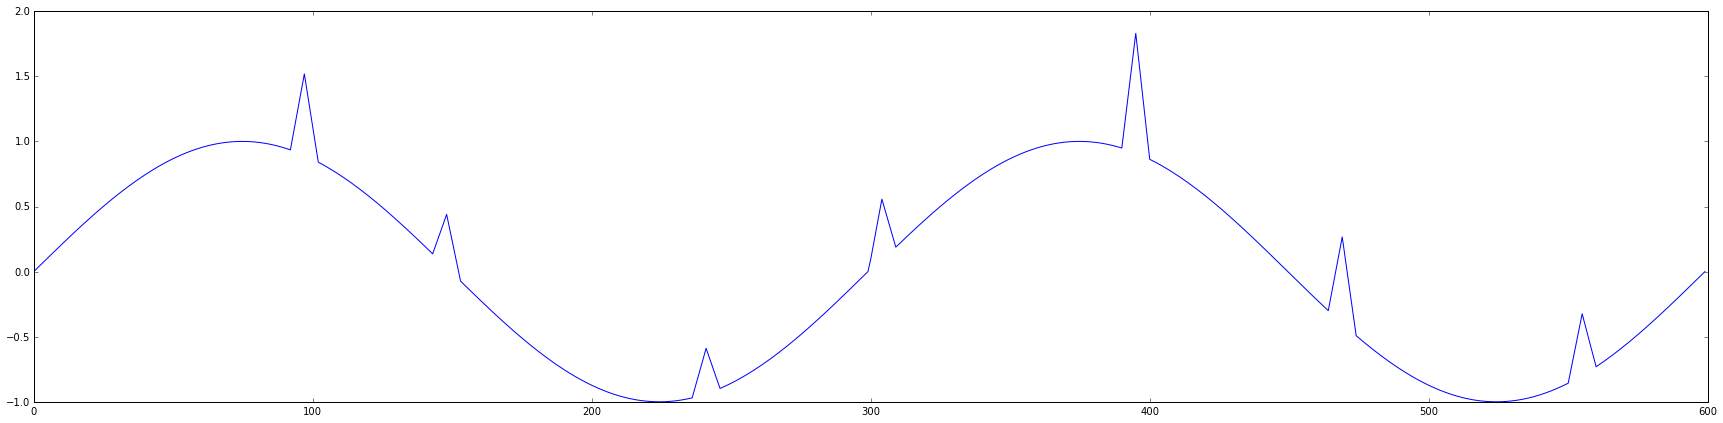

In [8]:
data_new = spikeAdder(data, tri)
plt.figure(figsize=(30,7))
plt.plot(data_new)

In [31]:
diff_noise = np.zeros((140,len(data))) 
noised_sines = np.zeros((140,len(data)))
medfilter = np.zeros((140,len(data)))
filtered_sines = np.zeros((140,len(data)))
behav = np.zeros(140)
wl = [17, 33, 65, 97, 129, 161, 193, 225, 257, 289, 321, 353, 385, 417, 449]
sn = [1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [32]:
# Alternative
values = np.zeros((len(wl), len(sn)))
count = -1
count2 = -1
for x in sn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, 0.706341266/np.sqrt(x), len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            behav[i] = np.sqrt(np.mean(np.square(filtered_sines[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("values2B.txt", values)

In [33]:
values2B = np.loadtxt("values2B.txt")

In [34]:
viridis_data = np.loadtxt("viridis_data.txt")

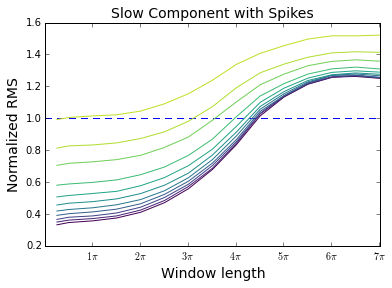

In [35]:
fig = plt.figure()
values4 = np.zeros((len(wl), len(sn)))
for i in range (11):
    # Normalize the RMS with the RMS of a normal sine wave
    values4[::,i] = values2B[::,i]/0.7069341
    ax = plt.subplot()
    xticks = np.arange(0, max(wl) + 1, 64)
    ax.set_xticks(xticks)
    # x_label = pi at each 64th point
    x_label = [r"${%s\pi}$" % (v) for v in range(len(xticks))]
    ax.set_xticklabels(x_label)
    plt.ylabel('Normalized RMS', size = 14)
    plt.xlabel('Window length', size = 14)
    plt.title('Slow Component with Spikes', size = 14)
    plt.plot(wl,values4[::,i], color=viridis_data[(i*25)-25,:])
    plt.hlines(1,1,max(wl), color = 'b', linestyle = '--')
plt.savefig("Slow Component new RMS2.png", dpi = 600)